# 本篇為二次優化查看頻道的各個影片資訊

## 同樣需要先導入package及設定需要的變數

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
api_service_name = "youtube"
api_version = "v3"
api_key = '你的金鑰'
youtube = build('youtube', 'v3', developerKey = api_key)

## 匯入上一支程式所匯出的excel

In [4]:
channel_data = pd.read_excel('MusicChannelData.xlsx', index_col=0)
channel_data

ChannelTitle                                 ChannelDescription  \
0   ヨルシカ / n-buna Official                     ヨルシカ / n-buna official channel   
1                 kobasolo  毎週金曜19時更新!!音楽プロデューサー、ミュージシャンとして活動するコバソロが贈るエンター...   
2           THE FIRST TAKE  A microphone and a white studio.\n\nAnd 1 rule...   
3             周杰倫 Jay Chou  Jay Chou 周杰倫\n\n“New King of Asian Pop” — Time...   
4                Pan Piano  台湾のピアニストです！ \nアニソンを弾いてます～ \n良かったら、チャンネル登録お願いしま...   
5                  2CELLOS  The official home of 2CELLOS - we post our new...   
6    Joe Hisaishi Official  久石譲のYouTube公式チャンネルです。Official YouTube channel ...   
7          First To Eleven  First to Eleven, Andie Case & Brooke Surgener ...   
8                      Ado                                              元気です。   
9           The Piano Guys  Welcome to the official The Piano Guys YouTube...   
10                 Eric周興哲  Hi! 我是Eric周興哲,\n\n從前的我 喜歡練習獨立 和鋼琴說話\n現在的自己 \n把...   
11                      美波                      【美波 Official Youtube Channel】   
12                   あいみょん  兵庫県西宮出身のシンガーソングライター。_x000D_\n15年3月にタワレコ限定singl...   
13        Ru's Piano Ru味春捲  I’m RuRu, a piano youtuber from Taiwan.\nMakin...   
14         Ayase / YOASOBI  シンガーソングライター、ボカロPのAyase、そしてAyaseがコンポーザーを務めるユニット...   
15                     星野源  音楽家・俳優・文筆家。\n2010年に1stアルバム『ばかのうた』にてソロデビュー。2016...   

   ChannelPublished Country  Subscribers  TotalViews  \
0        2013-03-22     NaN      2580000  1465894954   
1        2008-06-30      JP      3010000  1435937011   
2        2019-11-05      JP      6960000  2521573578   
3        2019-10-29      TW      2710000  3479411546   
4        2016-07-27      TW      3430000   540223603   
5        2011-10-17      HR      6320000  1633128098   
6        2017-01-27      JP       884000   141930811   
7        2015-12-08      US      1470000   429229469   
8        2018-08-18      JP      4370000  1625463501   
9        2008-03-25      US      7030000  2225527123   
10       2014-08-04      TW      1110000  1305973653   
11       2016-01-03      JP      1320000   423099409   
12       2014-03-14     NaN      1770000  1559078065   
13       2018-03-14      TW      2350000   305496093   
14       2018-11-16      JP      4120000  2147163665   
15       2015-05-08      JP      1480000   939959835   

                    Playlist  VideoCount  \
0   UURIgIJQWuBJ0Cv_VlU3USNA          51   
1   UUDbQblY1XASbgqOXmy6FOFQ         500   
2   UU9zY_E8mcAo_Oq772LEZq8Q         449   
3   UU8CU5nVhCQIdAGrFFp4loOQ          22   
4   UUI7ktPB6toqucpkkCiolwLg         566   
5   UUyjuFsbclXyntSRMBAILzbw         213   
6   UUxyzciBLt1Hyw06dlqwAIkw          51   
7   UUcE10s4MFy4eed7q7QkonZg         323   
8   UUln9P4Qm3-EAY4aiEPmRwEA          89   
9   UUmKurapML4BF9Bjtj4RbvXw         153   
10  UU7S48XRADBqamQbgLxpBFcQ         131   
11  UU2JzylaIF8qeowc7-5VwwmA           8   
12  UUQVhrypJhw1HxuRV4gX6hoQ          43   
13  UUAYrMNl92jw6cpjdpBP8JyA         413   
14  UUvpredjG93ifbCP1Y77JyFA         122   
15  UUPKlrgZXnnb89nSeITvTdGA          99   

                                         ChannelTopic  \
0   ['Music', 'Music_of_Asia', 'Pop_music', 'Indep...   
1             ['Pop_music', 'Music', 'Music_of_Asia']   
2             ['Pop_music', 'Music', 'Music_of_Asia']   
3             ['Pop_music', 'Music', 'Music_of_Asia']   
4       ['Classical_music', 'Music', 'Music_of_Asia']   
5   ['Music', 'Classical_music', 'Rock_music', 'In...   
6                        ['Music', 'Classical_music']   
7   ['Pop_music', 'Music', 'Independent_music', 'R...   
8   ['Pop_music', 'Music', 'Electronic_music', 'Ro...   
9           ['Pop_music', 'Music', 'Classical_music']   
10            ['Pop_music', 'Music', 'Music_of_Asia']   
11  ['Rock_music', 'Independent_music', 'Music', '...   
12  ['Rock_music', 'Music_of_Asia', 'Pop_music', '...   
13      ['Classical_music', 'Music', 'Music_of_Asia']   
14            ['Pop_music', 'Music', 'Music_of_Asia']   
15            ['Pop_mu

## 需要使用頻道的id才可取得頻道裡面，各個影片的 id
取得影片資訊：https://developers.google.com/youtube/v3/docs/playlistItems/list

In [5]:
df_ids = channel_data[['ChannelTitle', 'Playlist', 'VideoCount']]
df_ids

ChannelTitle                  Playlist  VideoCount
0   ヨルシカ / n-buna Official  UURIgIJQWuBJ0Cv_VlU3USNA          51
1                 kobasolo  UUDbQblY1XASbgqOXmy6FOFQ         500
2           THE FIRST TAKE  UU9zY_E8mcAo_Oq772LEZq8Q         449
3             周杰倫 Jay Chou  UU8CU5nVhCQIdAGrFFp4loOQ          22
4                Pan Piano  UUI7ktPB6toqucpkkCiolwLg         566
5                  2CELLOS  UUyjuFsbclXyntSRMBAILzbw         213
6    Joe Hisaishi Official  UUxyzciBLt1Hyw06dlqwAIkw          51
7          First To Eleven  UUcE10s4MFy4eed7q7QkonZg         323
8                      Ado  UUln9P4Qm3-EAY4aiEPmRwEA          89
9           The Piano Guys  UUmKurapML4BF9Bjtj4RbvXw         153
10                 Eric周興哲  UU7S48XRADBqamQbgLxpBFcQ         131
11                      美波  UU2JzylaIF8qeowc7-5VwwmA           8
12                   あいみょん  UUQVhrypJhw1HxuRV4gX6hoQ          43
13        Ru's Piano Ru味春捲  UUAYrMNl92jw6cpjdpBP8JyA         413
14         Ayase / YOASOBI  UUvpredjG93ifbCP1Y77JyFA         122
15                     星野源  UUPKlrgZXnnb89nSeITvTdGA          99

## 需要先透過"頻道"的id，取得各個"影片"的id
影片一次最多只能取得50筆(一頁50部影片)，故api有提供nextPagetoken這個變數，若此變數為True，我們就能取得其他頁數的影片id

In [6]:
def get_video_ids(youtube, playlist_id):
    
    request = youtube.playlistItems().list(
              part = 'contentDetails',
              playlistId = playlist_id,
              maxResults = 50) # 50 is max
    response = request.execute()
    
    video_ids = []
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
        
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages: 
        if next_page_token is None:
            more_pages = False
        else: # json存在nextPageToken，透過以下取得50以上的videos
            request = youtube.playlistItems().list(
                    part = 'contentDetails',
                    playlistId = playlist_id,
                    pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    print('影片數量:', len(video_ids))
    return video_ids

In [7]:
playlist_id01 = channel_data.loc[channel_data['ChannelTitle'] == "Ru's Piano Ru味春捲", 'Playlist'].iloc[0]
playlist_id02 = channel_data.loc[channel_data['ChannelTitle'] == 'Pan Piano', 'Playlist'].iloc[0]
playlist_id03 = channel_data.loc[channel_data['ChannelTitle'] == '2CELLOS', 'Playlist'].iloc[0]
playlist_id04 = channel_data.loc[channel_data['ChannelTitle'] == 'The Piano Guys', 'Playlist'].iloc[0]
playlist_id05 = channel_data.loc[channel_data['ChannelTitle'] == 'Joe Hisaishi Official', 'Playlist'].iloc[0]

playlist_id06 = channel_data.loc[channel_data['ChannelTitle'] == 'Ado', 'Playlist'].iloc[0]
playlist_id07 = channel_data.loc[channel_data['ChannelTitle'] == 'Ayase / YOASOBI', 'Playlist'].iloc[0]
playlist_id08 = channel_data.loc[channel_data['ChannelTitle'] == '星野源', 'Playlist'].iloc[0]
playlist_id09 = channel_data.loc[channel_data['ChannelTitle'] == '美波', 'Playlist'].iloc[0]
playlist_id10 = channel_data.loc[channel_data['ChannelTitle'] == 'あいみょん', 'Playlist'].iloc[0]
playlist_id11 = channel_data.loc[channel_data['ChannelTitle'] == 'ヨルシカ / n-buna Official', 'Playlist'].iloc[0]
playlist_id12 = channel_data.loc[channel_data['ChannelTitle'] == 'Eric周興哲', 'Playlist'].iloc[0]
playlist_id13 = channel_data.loc[channel_data['ChannelTitle'] == '周杰倫 Jay Chou', 'Playlist'].iloc[0]

playlist_id14 = channel_data.loc[channel_data['ChannelTitle'] == 'THE FIRST TAKE', 'Playlist'].iloc[0]
playlist_id15 = channel_data.loc[channel_data['ChannelTitle'] == 'kobasolo', 'Playlist'].iloc[0]
playlist_id16 = channel_data.loc[channel_data['ChannelTitle'] == 'First To Eleven', 'Playlist'].iloc[0]

In [8]:
video_ids01 = get_video_ids(youtube, playlist_id01)
video_ids02 = get_video_ids(youtube, playlist_id02)
video_ids03 = get_video_ids(youtube, playlist_id03)
video_ids04 = get_video_ids(youtube, playlist_id04)
video_ids05 = get_video_ids(youtube, playlist_id05)
video_ids06 = get_video_ids(youtube, playlist_id06)
video_ids07 = get_video_ids(youtube, playlist_id07)
video_ids08 = get_video_ids(youtube, playlist_id08)
video_ids09 = get_video_ids(youtube, playlist_id09)
video_ids10 = get_video_ids(youtube, playlist_id10)
video_ids11 = get_video_ids(youtube, playlist_id11)
video_ids12 = get_video_ids(youtube, playlist_id12)
video_ids13 = get_video_ids(youtube, playlist_id13)
video_ids14 = get_video_ids(youtube, playlist_id14)
video_ids15 = get_video_ids(youtube, playlist_id15)
video_ids16 = get_video_ids(youtube, playlist_id16)

影片數量: 412
影片數量: 564
影片數量: 216
影片數量: 153
影片數量: 89
影片數量: 90
影片數量: 123
影片數量: 112
影片數量: 8
影片數量: 123
影片數量: 52
影片數量: 131
影片數量: 350
影片數量: 449
影片數量: 537
影片數量: 323


## 可透過以下測試查看"影片"的欄位資料

In [8]:
# def test_channel_video_detail(youtube, video_ids):
#     for i in range(0, len(video_ids), 50):
#         request = youtube.videos().list(
#         part = 'snippet, statistics,topicDetails, status, player, liveStreamingDetails',
#         id=','.join(video_ids[i:i+50]))
#     response = request.execute()
    
#     return response

In [8]:
# test_channel_video_detail(youtube, video_ids01) 

## 查看過後抓取特定欄位並轉成將其轉為dictionary

In [9]:
def get_channel_video_detail(youtube, video_ids):
    
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
        part = 'snippet, statistics, topicDetails',
        id=','.join(video_ids[i:i+50]))
        response = request.execute()
        for video in response['items']:
            video_stats = dict(ChannelTitle = video['snippet']['channelTitle'],
                               VideoTitle = video['snippet']['title'],
                               Description = video['snippet']['description'],
                               PublishedAt = video['snippet']['publishedAt'],
                               Language = '',
                               Views = video['statistics']['viewCount'],
                               Likes = '',
                               CommentCount = '',
                               Image = video['snippet']['thumbnails']['high']['url'],
                               Tags = '',
                               VideoTopic = '')
            if 'tags' in video['snippet']:video_stats['Tags'] = video['snippet']['tags']
            if 'topicDetails' in video:video_stats['VideoTopic'] = video['topicDetails']['topicCategories']
            if 'defaultAudioLanguage' in video['snippet']:video_stats['Language'] = video['snippet']['defaultAudioLanguage']
            if 'commentCount' in video['statistics']:video_stats['CommentCount'] = video['statistics']['commentCount']
            if 'likecount' in video['statistics']:video_stats['Likes'] = video['statistics']['likeCount']
            all_video_stats.append(video_stats)
    return all_video_stats

In [10]:
video_details01 = get_channel_video_detail(youtube, video_ids01)
video_details02 = get_channel_video_detail(youtube, video_ids02)
video_details03 = get_channel_video_detail(youtube, video_ids03)
video_details04 = get_channel_video_detail(youtube, video_ids04)
video_details05 = get_channel_video_detail(youtube, video_ids05)
video_details06 = get_channel_video_detail(youtube, video_ids06)
video_details07 = get_channel_video_detail(youtube, video_ids07)
video_details08 = get_channel_video_detail(youtube, video_ids08)
video_details09 = get_channel_video_detail(youtube, video_ids09)
video_details10 = get_channel_video_detail(youtube, video_ids10)
video_details11 = get_channel_video_detail(youtube, video_ids11)
video_details12 = get_channel_video_detail(youtube, video_ids12)
video_details13 = get_channel_video_detail(youtube, video_ids13)
video_details14 = get_channel_video_detail(youtube, video_ids14)
video_details15 = get_channel_video_detail(youtube, video_ids15)
video_details16 = get_channel_video_detail(youtube, video_ids16)

## 取得過後同樣將其轉為DataFrame以方便查看

In [11]:
data_rurupaino = pd.DataFrame(video_details01)
data_panpaino = pd.DataFrame(video_details02)
data_2CELLOS = pd.DataFrame(video_details03)
data_thepainoguys = pd.DataFrame(video_details04)
data_joehisaishi = pd.DataFrame(video_details05)

data_ado = pd.DataFrame(video_details06)
data_YOASOBI = pd.DataFrame(video_details07)
data_hoshinogen = pd.DataFrame(video_details08)
data_minami = pd.DataFrame(video_details09)
data_aimyo = pd.DataFrame(video_details10)
data_yurushika = pd.DataFrame(video_details11)
data_ericchou = pd.DataFrame(video_details12)
data_jaychou = pd.DataFrame(video_details13)

data_thefirsttake = pd.DataFrame(video_details14)
data_kobasolo = pd.DataFrame(video_details15)
data_firsttoeleven = pd.DataFrame(video_details16)

## 同樣針對部分資料做整理，包含主題、資料型態等

In [12]:
def get_topic(df):
    col = []
    topic = []
    for i in df['VideoTopic']:
        if i == '':
            col.append('')
        else:
            for j in range(len(i)):
                topic.append(i[j].split('/')[4])
            col.append(topic)
            topic = []
    df['VideoTopic'] = col
    return df.head()

In [13]:
get_topic(data_rurupaino)
get_topic(data_panpaino)
get_topic(data_2CELLOS)
get_topic(data_thepainoguys)
get_topic(data_joehisaishi)

get_topic(data_ado)
get_topic(data_YOASOBI) 
get_topic(data_hoshinogen)
get_topic(data_minami)
get_topic(data_aimyo)
get_topic(data_yurushika)
get_topic(data_ericchou)
get_topic(data_jaychou)

get_topic(data_thefirsttake)
get_topic(data_kobasolo)
get_topic(data_firsttoeleven)

ChannelTitle                                         VideoTitle  \
0  First To Eleven  "Anti-Hero" - Taylor Swift (Cover by First to ...   
1  First To Eleven  “Don’t Look Back in Anger” - Oasis (Acoustic C...   
2  First To Eleven  "Dirty Girl" - Brooke Surgener (Cover by First...   
3  First To Eleven  "Chocolate" - The 1975 (Acoustic Cover by Firs...   
4  First To Eleven  "Dayman"  -  It's Always Sunny In Philadelphia...   

                                         Description           PublishedAt  \
0  Our cover of “Anti-Hero" by Taylor Swift!\n\nS...  2022-11-10T17:00:05Z   
1  Our acoustic cover of “Don’t Look Back in Ange...  2022-11-08T17:00:33Z   
2  Our cover of “Dirty Girl" by our friend @Brook...  2022-11-03T16:00:19Z   
3  Our acoustic cover of “Chocolate" by The 1975!...  2022-11-01T16:00:11Z   
4  Our cover of “Dayman" from the show It's Alway...  2022-10-27T16:00:16Z   

  Language   Views Likes CommentCount  \
0       en   57048                265   
1       en  129478                393   
2       en   79147                175   
3       en   68289                183   
4       en   43127                239   

                                              Image  \
0  https://i.ytimg.com/vi/TUS9zq9Iy-Y/hqdefault.jpg   
1  https://i.ytimg.com/vi/5NTG9CoNOtI/hqdefault.jpg   
2  https://i.ytimg.com/vi/spufPpppjnY/hqdefault.jpg   
3  https://i.ytimg.com/vi/vtOyydVZIF8/hqdefault.jpg   
4  https://i.ytimg.com/vi/ZAWo8zSkQrE/hqdefault.jpg   

                                                Tags  \
0  [anti hero, anti-hero, taylor swift, midnights...   
1  [dont look back in anger, oasis, wonderwall, f...   
2  [dirty girl, brooke surgener, gimme gimme, fol...   
3  [chocolate, 1975, the 1975, being funny in a f...   
4  [dayman, dayman cometh, nightman cometh, alway...   

                                          VideoTopic  
0    [Christian_music, Music, Pop_music, Rock_music]  
1                     [Music, Pop_music, Rock_music]  
2  [Independent_music, Music, Pop_music, Rock_music]  
3                     [Music, Pop_music, Rock_music]  
4                     [Music, Pop_music, Rock_music]

## 資量型態轉換

In [14]:
def columns_type_format(df):
    df['PublishedAt'] = pd.to_datetime(df['PublishedAt']).dt.date
    df['Views'] = pd.to_numeric(df['Views'])
    df['Likes'] = pd.to_numeric(df['Likes'])
    df['CommentCount'] = pd.to_numeric(df['CommentCount'])
    return df.head()

In [15]:
columns_type_format(data_rurupaino)
columns_type_format(data_panpaino)
columns_type_format(data_2CELLOS)
columns_type_format(data_thepainoguys)
columns_type_format(data_joehisaishi)

columns_type_format(data_ado)
columns_type_format(data_YOASOBI) 
columns_type_format(data_hoshinogen)
columns_type_format(data_minami)
columns_type_format(data_aimyo)
columns_type_format(data_yurushika)
columns_type_format(data_ericchou)
columns_type_format(data_jaychou)

columns_type_format(data_thefirsttake)
columns_type_format(data_kobasolo)
columns_type_format(data_firsttoeleven)

ChannelTitle                                         VideoTitle  \
0  First To Eleven  "Anti-Hero" - Taylor Swift (Cover by First to ...   
1  First To Eleven  “Don’t Look Back in Anger” - Oasis (Acoustic C...   
2  First To Eleven  "Dirty Girl" - Brooke Surgener (Cover by First...   
3  First To Eleven  "Chocolate" - The 1975 (Acoustic Cover by Firs...   
4  First To Eleven  "Dayman"  -  It's Always Sunny In Philadelphia...   

                                         Description PublishedAt Language  \
0  Our cover of “Anti-Hero" by Taylor Swift!\n\nS...  2022-11-10       en   
1  Our acoustic cover of “Don’t Look Back in Ange...  2022-11-08       en   
2  Our cover of “Dirty Girl" by our friend @Brook...  2022-11-03       en   
3  Our acoustic cover of “Chocolate" by The 1975!...  2022-11-01       en   
4  Our cover of “Dayman" from the show It's Alway...  2022-10-27       en   

    Views  Likes  CommentCount  \
0   57048    NaN           265   
1  129478    NaN           393   
2   79147    NaN           175   
3   68289    NaN           183   
4   43127    NaN           239   

                                              Image  \
0  https://i.ytimg.com/vi/TUS9zq9Iy-Y/hqdefault.jpg   
1  https://i.ytimg.com/vi/5NTG9CoNOtI/hqdefault.jpg   
2  https://i.ytimg.com/vi/spufPpppjnY/hqdefault.jpg   
3  https://i.ytimg.com/vi/vtOyydVZIF8/hqdefault.jpg   
4  https://i.ytimg.com/vi/ZAWo8zSkQrE/hqdefault.jpg   

                                                Tags  \
0  [anti hero, anti-hero, taylor swift, midnights...   
1  [dont look back in anger, oasis, wonderwall, f...   
2  [dirty girl, brooke surgener, gimme gimme, fol...   
3  [chocolate, 1975, the 1975, being funny in a f...   
4  [dayman, dayman cometh, nightman cometh, alway...   

                                          VideoTopic  
0    [Christian_music, Music, Pop_music, Rock_music]  
1                     [Music, Pop_music, Rock_music]  
2  [Independent_music, Music, Pop_music, Rock_music]  
3                     [Music, Pop_music, Rock_music]  
4                     [Music, Pop_music, Rock_music]

## 畫出個別頻道的文字雲

In [16]:
from collections import Counter
from wordcloud import WordCloud
from PIL import Image
from os import path
def plot_wordcloud(df):
    print('ChannelName:', df['ChannelTitle'][0])
    all_terms = []
    if df['Tags'].isnull().all():
        return 'No Tags'
    else:
        for terms in df['Tags']:
            all_terms.extend(terms)
        sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)        

        # mask = np.array(Image.open("wordcloud.png"))
        font_path = 'ttf/GenEiAntiquePv5-M.ttf'
        wc = WordCloud(width=1600, height=800, background_color='white', font_path = font_path)
        wc.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
        plt.figure(figsize=(12, 8))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.show()

ChannelName: Ru's Piano Ru味春捲


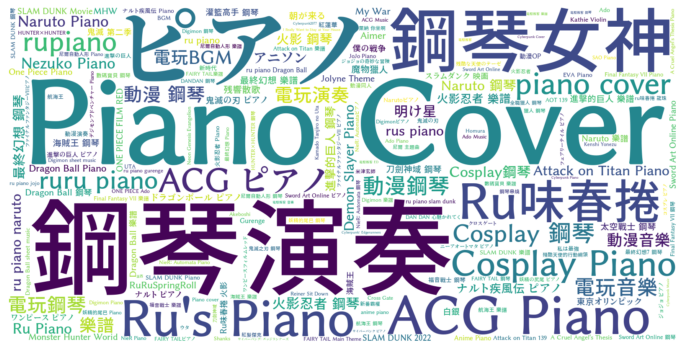

ChannelName: Pan Piano


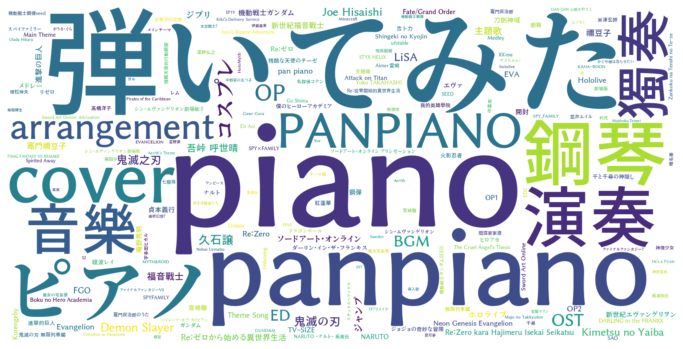

ChannelName: 2CELLOS


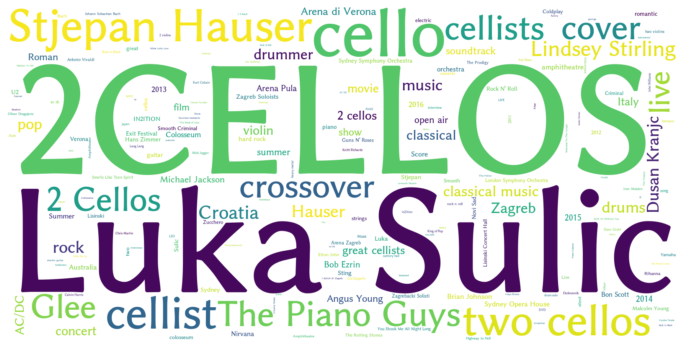

ChannelName: The Piano Guys


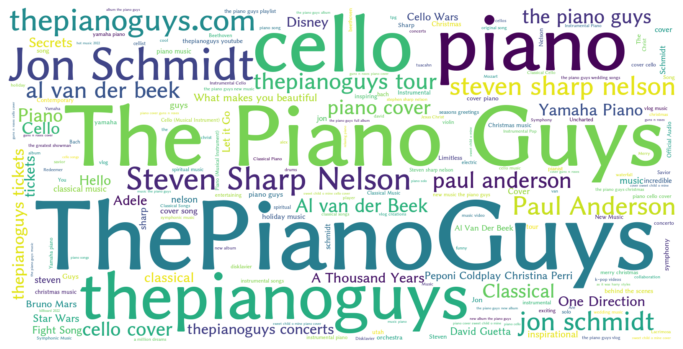

ChannelName: Joe Hisaishi Official


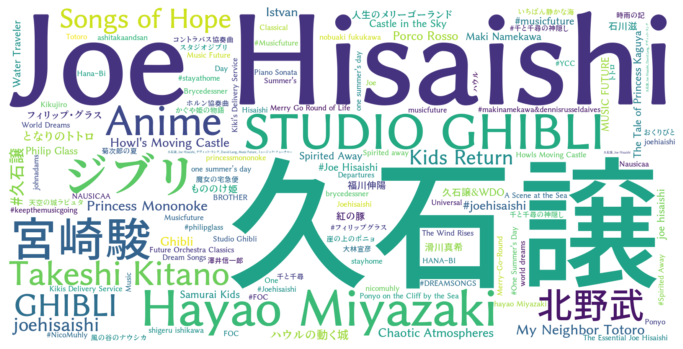

ChannelName: Ado


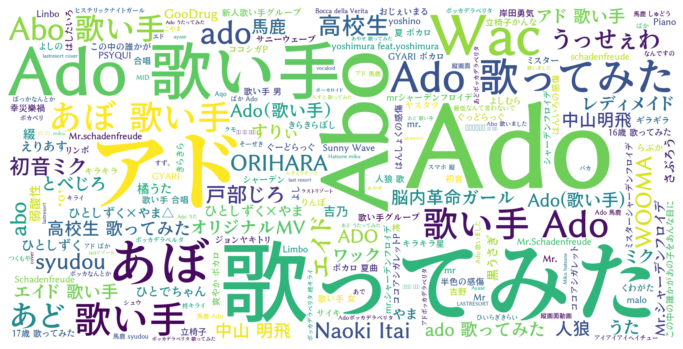

ChannelName: Ayase / YOASOBI


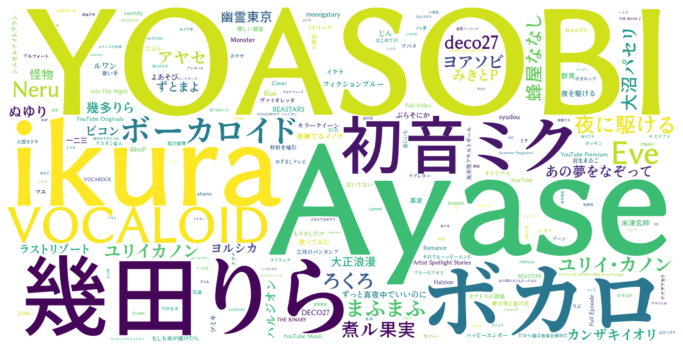

ChannelName: 星野源


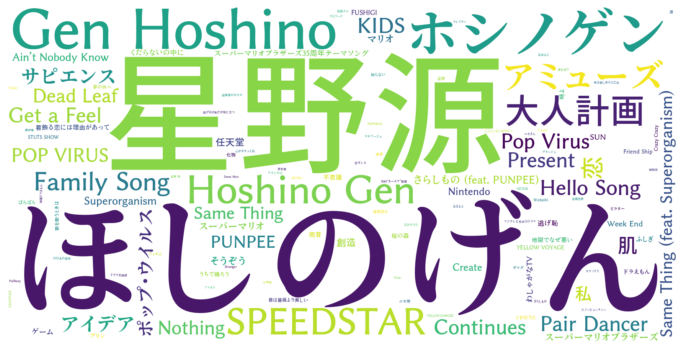

ChannelName: あいみょん


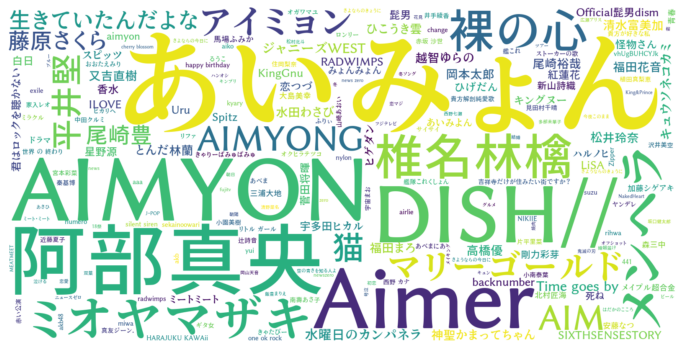

ChannelName: ヨルシカ / n-buna Official


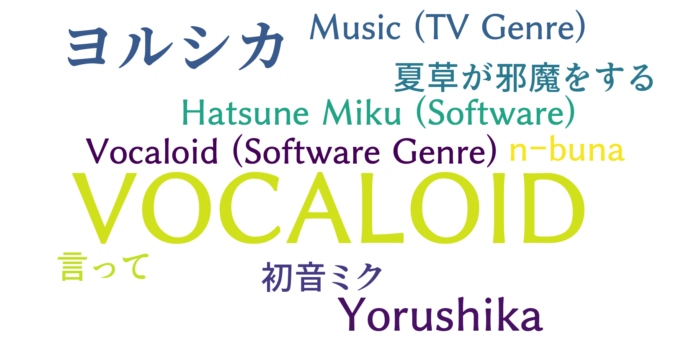

ChannelName: Eric周興哲


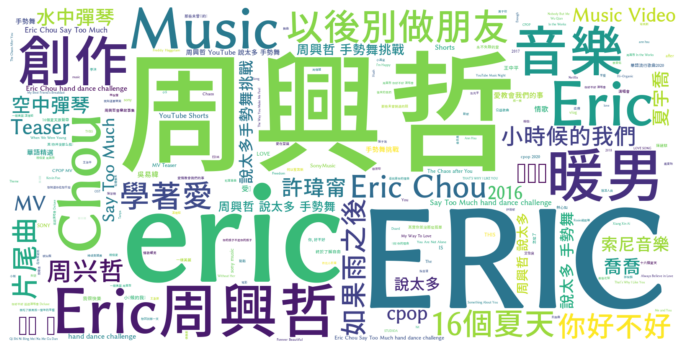

ChannelName: 周杰倫 Jay Chou


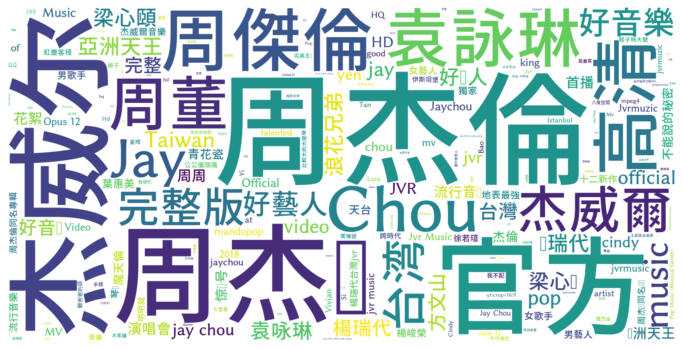

ChannelName: THE FIRST TAKE


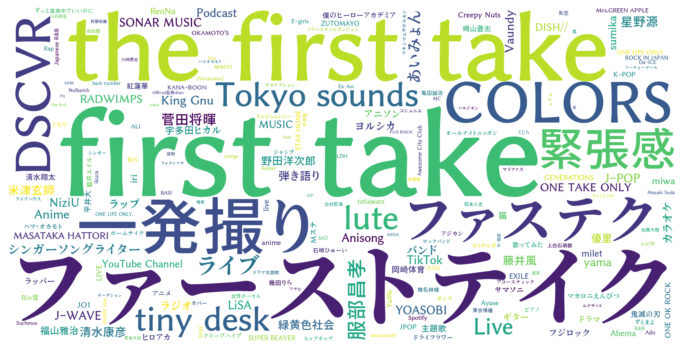

ChannelName: kobasolo


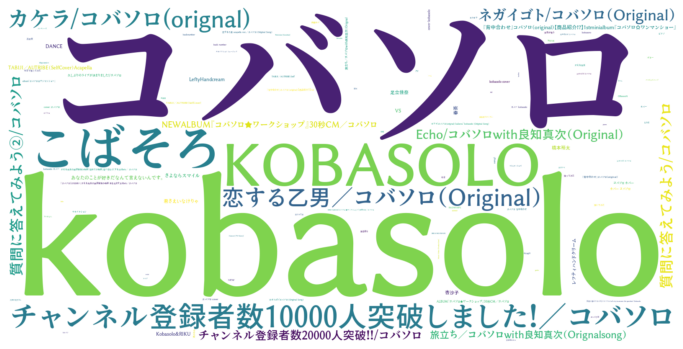

ChannelName: First To Eleven


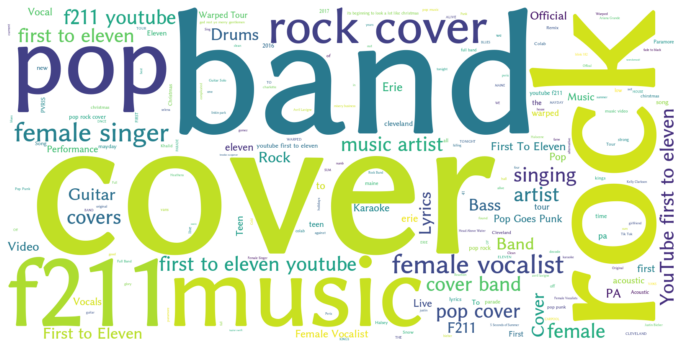

In [17]:
plot_wordcloud(data_rurupaino)
plot_wordcloud(data_panpaino)
plot_wordcloud(data_2CELLOS)
plot_wordcloud(data_thepainoguys)
plot_wordcloud(data_joehisaishi)

plot_wordcloud(data_ado)
plot_wordcloud(data_YOASOBI) 
plot_wordcloud(data_hoshinogen)
# plot_wordcloud(data_minami)
plot_wordcloud(data_aimyo)
plot_wordcloud(data_yurushika)
plot_wordcloud(data_ericchou)
plot_wordcloud(data_jaychou)

plot_wordcloud(data_thefirsttake)
plot_wordcloud(data_kobasolo)
plot_wordcloud(data_firsttoeleven)

## 合併全部的表格

In [18]:
data_all_channel = pd.concat([data_rurupaino,
                             data_panpaino,
                             data_2CELLOS,
                             data_thepainoguys,
                             data_joehisaishi,
                             data_ado,
                             data_YOASOBI,
                             data_hoshinogen,
                             data_minami,
                             data_aimyo,
                             data_yurushika,
                             data_ericchou,
                             data_jaychou,
                             data_thefirsttake,
                             data_kobasolo,
                             data_firsttoeleven],ignore_index=True)

In [19]:
data_all_channel.head()

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  「The Blessing / YOASOBI」Mobile Suit Gundam THE...   
1  Ru's Piano Ru味春捲  SLAM DUNK ED3「Kirameku Toki ni Torawarete / 煌め...   
2  Ru's Piano Ru味春捲  Sword Art Online「Swordland」Ru's Piano Cover - ...   
3  Ru's Piano Ru味春捲  When Chainsaw Man Plays「KICK BACK」as Himself |...   
4  Ru's Piano Ru味春捲  Cyberpunk: Edgerunners OST「Who's Ready for Tom...   

                                         Description PublishedAt Language  \
0  「The Blessing / YOASOBI」Mobile Suit Gundam THE...  2022-11-11    en-US   
1  SLAM DUNK ED3「Kirameku Toki ni Torawarete」Pian...  2022-11-09    en-US   
2  Sword Art Online「Swordland」Ru's Piano Cover\n⚔...  2022-11-05    en-US   
3  When Chainsaw Man Plays「KICK BACK」as Himself \...  2022-10-29    en-US   
4  Cyberpunk: Edgerunners OST「Who's Ready for Tom...  2022-10-26    en-US   

    Views  Likes  CommentCount  \
0       5    NaN          63.0   
1   57000    NaN         408.0   
2   46584    NaN         989.0   
3  388591    NaN        1049.0   
4   97613    NaN         383.0   

                                              Image  \
0  https://i.ytimg.com/vi/N3wdDiraq4g/hqdefault.jpg   
1  https://i.ytimg.com/vi/ecnwcQkregA/hqdefault.jpg   
2  https://i.ytimg.com/vi/gpjRHPwfsGw/hqdefault.jpg   
3  https://i.ytimg.com/vi/4lI2JIrbfuk/hqdefault.jpg   
4  https://i.ytimg.com/vi/J066w2P9mf0/hqdefault.jpg   

                                                Tags  \
0  [祝福, Shukufuku, The Blessing, YOASOBI, Mobile ...   
1  [SLAM DUNK ED3, 煌めく瞬間に捕われて, 捕捉閃耀的瞬間, スラムダンクED3...   
2  [Swordland, Sword Art Online, 刀劍神域, SAO, ソードアー...   
3  [KICK BACK, Chainsaw Man, チェンソーマン, 鏈鋸人, KICK B...   
4  [Who's Ready for Tomorrow, I Really Want to St...   

                                VideoTopic  
0                   [Music, Music_of_Asia]  
1  [Classical_music, Music, Music_of_Asia]  
2  [Classical_music, Music, Music_of_Asia]  
3  [Classical_music, Music, Music_of_Asia]  
4                   [Music, Music_of_Asia]

In [20]:
def cal_tag_num(df):
    tag_num = []
    for i in df['Tags']:
        tag_num.append(len(i))
    df.insert(10, column = "VideoTagNum", value = tag_num)
    return df.head()

In [21]:
cal_tag_num(data_all_channel)

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  「The Blessing / YOASOBI」Mobile Suit Gundam THE...   
1  Ru's Piano Ru味春捲  SLAM DUNK ED3「Kirameku Toki ni Torawarete / 煌め...   
2  Ru's Piano Ru味春捲  Sword Art Online「Swordland」Ru's Piano Cover - ...   
3  Ru's Piano Ru味春捲  When Chainsaw Man Plays「KICK BACK」as Himself |...   
4  Ru's Piano Ru味春捲  Cyberpunk: Edgerunners OST「Who's Ready for Tom...   

                                         Description PublishedAt Language  \
0  「The Blessing / YOASOBI」Mobile Suit Gundam THE...  2022-11-11    en-US   
1  SLAM DUNK ED3「Kirameku Toki ni Torawarete」Pian...  2022-11-09    en-US   
2  Sword Art Online「Swordland」Ru's Piano Cover\n⚔...  2022-11-05    en-US   
3  When Chainsaw Man Plays「KICK BACK」as Himself \...  2022-10-29    en-US   
4  Cyberpunk: Edgerunners OST「Who's Ready for Tom...  2022-10-26    en-US   

    Views  Likes  CommentCount  \
0       5    NaN          63.0   
1   57000    NaN         408.0   
2   46584    NaN         989.0   
3  388591    NaN        1049.0   
4   97613    NaN         383.0   

                                              Image  \
0  https://i.ytimg.com/vi/N3wdDiraq4g/hqdefault.jpg   
1  https://i.ytimg.com/vi/ecnwcQkregA/hqdefault.jpg   
2  https://i.ytimg.com/vi/gpjRHPwfsGw/hqdefault.jpg   
3  https://i.ytimg.com/vi/4lI2JIrbfuk/hqdefault.jpg   
4  https://i.ytimg.com/vi/J066w2P9mf0/hqdefault.jpg   

                                                Tags  VideoTagNum  \
0  [祝福, Shukufuku, The Blessing, YOASOBI, Mobile ...           46   
1  [SLAM DUNK ED3, 煌めく瞬間に捕われて, 捕捉閃耀的瞬間, スラムダンクED3...           35   
2  [Swordland, Sword Art Online, 刀劍神域, SAO, ソードアー...           41   
3  [KICK BACK, Chainsaw Man, チェンソーマン, 鏈鋸人, KICK B...           40   
4  [Who's Ready for Tomorrow, I Really Want to St...           37   

                                VideoTopic  
0                   [Music, Music_of_Asia]  
1  [Classical_music, Music, Music_of_Asia]  
2  [Classical_music, Music, Music_of_Asia]  
3  [Classical_music, Music, Music_of_Asia]  
4                   [Music, Music_of_Asia]

In [22]:
def cal_topic_num(df):
    topic_num = []
    for i in df['VideoTopic']:
        topic_num.append(len(i))
    df.insert(12, column = "VideoTopicNum", value = topic_num)
    return df.head()

In [23]:
cal_topic_num(data_all_channel)

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  「The Blessing / YOASOBI」Mobile Suit Gundam THE...   
1  Ru's Piano Ru味春捲  SLAM DUNK ED3「Kirameku Toki ni Torawarete / 煌め...   
2  Ru's Piano Ru味春捲  Sword Art Online「Swordland」Ru's Piano Cover - ...   
3  Ru's Piano Ru味春捲  When Chainsaw Man Plays「KICK BACK」as Himself |...   
4  Ru's Piano Ru味春捲  Cyberpunk: Edgerunners OST「Who's Ready for Tom...   

                                         Description PublishedAt Language  \
0  「The Blessing / YOASOBI」Mobile Suit Gundam THE...  2022-11-11    en-US   
1  SLAM DUNK ED3「Kirameku Toki ni Torawarete」Pian...  2022-11-09    en-US   
2  Sword Art Online「Swordland」Ru's Piano Cover\n⚔...  2022-11-05    en-US   
3  When Chainsaw Man Plays「KICK BACK」as Himself \...  2022-10-29    en-US   
4  Cyberpunk: Edgerunners OST「Who's Ready for Tom...  2022-10-26    en-US   

    Views  Likes  CommentCount  \
0       5    NaN          63.0   
1   57000    NaN         408.0   
2   46584    NaN         989.0   
3  388591    NaN        1049.0   
4   97613    NaN         383.0   

                                              Image  \
0  https://i.ytimg.com/vi/N3wdDiraq4g/hqdefault.jpg   
1  https://i.ytimg.com/vi/ecnwcQkregA/hqdefault.jpg   
2  https://i.ytimg.com/vi/gpjRHPwfsGw/hqdefault.jpg   
3  https://i.ytimg.com/vi/4lI2JIrbfuk/hqdefault.jpg   
4  https://i.ytimg.com/vi/J066w2P9mf0/hqdefault.jpg   

                                                Tags  VideoTagNum  \
0  [祝福, Shukufuku, The Blessing, YOASOBI, Mobile ...           46   
1  [SLAM DUNK ED3, 煌めく瞬間に捕われて, 捕捉閃耀的瞬間, スラムダンクED3...           35   
2  [Swordland, Sword Art Online, 刀劍神域, SAO, ソードアー...           41   
3  [KICK BACK, Chainsaw Man, チェンソーマン, 鏈鋸人, KICK B...           40   
4  [Who's Ready for Tomorrow, I Really Want to St...           37   

                                VideoTopic  VideoTopicNum  
0                   [Music, Music_of_Asia]              2  
1  [Classical_music, Music, Music_of_Asia]              3  
2  [Classical_music, Music, Music_of_Asia]              3  
3  [Classical_music, Music, Music_of_Asia]              3  
4                   [Music, Music_of_Asia]              2

In [24]:
def topic_to_col(df):
    max_topic_num = max(df['VideoTopic'].str.len())
    topic_col = []
    topic_num = []
    for i in range(max_topic_num):
        topic_col.append(f'VideoTopic{i+1}')
    if df['VideoTopic'][0] == '':
        df['VideoTopic'][0] = []
    df1 = pd.DataFrame(df['VideoTopic'].tolist(), columns = topic_col)
    df2 = pd.concat([df, df1], axis=1)
    df2['VideoTopic'][0] = ''
    df = df2
    return df

In [25]:
# data_2CELLOS = topic_to_col(data_2CELLOS)
# data_minami = topic_to_col(data_minami)
# data_ado = topic_to_col(data_ado)
# data_YOASOBI = topic_to_col(data_YOASOBI)
# data_hoshinogen = topic_to_col(data_hoshinogen)
# data_kobasolo = topic_to_col(data_kobasolo)
# data_rurupaino = topic_to_col(data_rurupaino)
# data_panpaino = topic_to_col(data_panpaino)
# data_thefirsttake = topic_to_col(data_thefirsttake)
data_all_channel = topic_to_col(data_all_channel)

/var/folders/tt/k9v_l22j5nx90qgy_z36k4zh0000gn/T/ipykernel_1909/2216340177.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['VideoTopic'][0] = ''


In [26]:
def tags_to_col(df):
    max_topic_num = max(df['Tags'].str.len())
    tag_col = []
    tag_num = []
    for i in range(max_topic_num):
        tag_col.append(f'Tag{i+1}')
    if df['Tags'][0] == '':
        df['Tags'][0] = []
    df1 = pd.DataFrame(df['Tags'].tolist(), columns = tag_col)
    df2 = pd.concat([df, df1], axis=1)
    df2['Tags'][0] = ''
    df = df2
    return df

In [27]:
# data_2CELLOS = tags_to_col(data_2CELLOS)
# # tag_to_col(data_minami)
# data_ado = tags_to_col(data_ado)
# data_YOASOBI = tags_to_col(data_YOASOBI)
# data_hoshinogen = tags_to_col(data_hoshinogen)
# data_kobasolo = tags_to_col(data_kobasolo)
# data_rurupaino = tags_to_col(data_rurupaino)
# data_panpaino = tags_to_col(data_panpaino)
# data_thefirsttake = tags_to_col(data_thefirsttake)
data_all_channel = tags_to_col(data_all_channel)

/var/folders/tt/k9v_l22j5nx90qgy_z36k4zh0000gn/T/ipykernel_1909/2242556798.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tags'][0] = ''


In [28]:
data_all_channel.head()

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  「The Blessing / YOASOBI」Mobile Suit Gundam THE...   
1  Ru's Piano Ru味春捲  SLAM DUNK ED3「Kirameku Toki ni Torawarete / 煌め...   
2  Ru's Piano Ru味春捲  Sword Art Online「Swordland」Ru's Piano Cover - ...   
3  Ru's Piano Ru味春捲  When Chainsaw Man Plays「KICK BACK」as Himself |...   
4  Ru's Piano Ru味春捲  Cyberpunk: Edgerunners OST「Who's Ready for Tom...   

                                         Description PublishedAt Language  \
0  「The Blessing / YOASOBI」Mobile Suit Gundam THE...  2022-11-11    en-US   
1  SLAM DUNK ED3「Kirameku Toki ni Torawarete」Pian...  2022-11-09    en-US   
2  Sword Art Online「Swordland」Ru's Piano Cover\n⚔...  2022-11-05    en-US   
3  When Chainsaw Man Plays「KICK BACK」as Himself \...  2022-10-29    en-US   
4  Cyberpunk: Edgerunners OST「Who's Ready for Tom...  2022-10-26    en-US   

    Views  Likes  CommentCount  \
0       5    NaN          63.0   
1   57000    NaN         408.0   
2   46584    NaN         989.0   
3  388591    NaN        1049.0   
4   97613    NaN         383.0   

                                              Image  \
0  https://i.ytimg.com/vi/N3wdDiraq4g/hqdefault.jpg   
1  https://i.ytimg.com/vi/ecnwcQkregA/hqdefault.jpg   
2  https://i.ytimg.com/vi/gpjRHPwfsGw/hqdefault.jpg   
3  https://i.ytimg.com/vi/4lI2JIrbfuk/hqdefault.jpg   
4  https://i.ytimg.com/vi/J066w2P9mf0/hqdefault.jpg   

                                                Tags  ...  Tag67 Tag68  Tag69  \
0                                                     ...   None  None   None   
1  [SLAM DUNK ED3, 煌めく瞬間に捕われて, 捕捉閃耀的瞬間, スラムダンクED3...  ...   None  None   None   
2  [Swordland, Sword Art Online, 刀劍神域, SAO, ソードアー...  ...   None  None   None   
3  [KICK BACK, Chainsaw Man, チェンソーマン, 鏈鋸人, KICK B...  ...   None  None   None   
4  [Who's Ready for Tomorrow, I Really Want to St...  ...   None  None   None   

  Tag70 Tag71 Tag72 Tag73 Tag74 Tag75 Tag76  
0  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  

[5 rows x 95 columns]

## 將影片資訊寫入到excel中

In [29]:
# import os 
# import numpy as np

# # 開一個新的excel並把多個df寫到同excel不同sheet
# path = os.path.join(os.getcwd(), 'channel_video_details.xlsx') # 設定路徑及檔名
# writer = pd.ExcelWriter(path, engine='xlsxwriter') # 指定引擎openpyxl

# data_ado.to_excel(writer, sheet_name='Ado', index=False)
# data_thefirsttake.to_excel(writer, sheet_name='The First Take', index=False)
# data_2CELLOS.to_excel(writer, sheet_name='2CELLOS', index=False)
# data_minami.to_excel(writer, sheet_name='美波', index=False)
# data_hoshinogen.to_excel(writer, sheet_name='星野源', index=False)
# data_kobasolo.to_excel(writer, sheet_name='Kobasolo', index=False)
# data_rurupaino.to_excel(writer, sheet_name='Ru味春捲 Paino', index=False)
# data_panpaino.to_excel(writer, sheet_name='Pan Paino', index=False)
# data_YOASOBI.to_excel(writer, sheet_name='Yoasobi', index=False)
# writer.save()
data_all_channel.to_excel('MusicChannelDetails.xlsx', index=False)

## 可簡易的查看頻道前10名的影片內容

In [30]:
top10_videos = data_all_channel.sort_values(by='Views', ascending=False).head(10)
top10_videos

ChannelTitle                                         VideoTitle  \
1874            あいみょん              あいみょん - マリーゴールド【OFFICIAL MUSIC VIDEO】   
1634  Ayase / YOASOBI                YOASOBI「夜に駆ける」 Official Music Video   
1499              Ado                                         【Ado】うっせぇわ   
1617  Ayase / YOASOBI  YOASOBI「怪物」Official Music Video　(YOASOBI - Mon...   
1750              星野源                           星野源 – 恋 (Official Video)   
1123          2CELLOS           2CELLOS - Thunderstruck [OFFICIAL VIDEO]   
2138     周杰倫 Jay Chou  周杰倫 Jay Chou (特別演出: 派偉俊)【告白氣球 Love Confession】...   
1317   The Piano Guys  Christina Perri - A Thousand Years (Piano/Cell...   
2071          Eric周興哲  Eric周興哲《以後別做朋友 The Distance of Love》Official M...   
2049          Eric周興哲  Eric周興哲《你，好不好？ How Have You Been?》Official Mus...   

                                            Description PublishedAt Language  \
1874  "いま会いたい人は誰ですか？"\n2018年8月8日発売 5thシングル「マリーゴールド」M...  2018-07-17       ja   
1634  ダウンロード/ストリーミング配信：https://orcd.co/yoasobi_yorun...  2019-11-16       ja   
1499  正しさとは 愚かさとは それが何か見せつけてやる \n\nダウンロード/ストリーミング配信は...  2020-10-23       ja   
1617  Download＆Streaming配信中:https://orcd.co/kaibutsu...  2021-01-13       ja   
1750  星野源 9th Single『恋』\n https://jvcmusic.lnk.to/ko...  2016-09-20       ja   
1123  http://www.instagram.com/2cellosofficial \nhtt...  2014-02-18            
2138  【告白氣球 Love Confession】\n詞/方文山   曲/周杰倫\n\n戀戀巴黎香...  2016-10-27    zh-TW   
1317  ► Get our albums here: https://smarturl.it/TPG...  2012-05-10    en-US   
2071  📌 English/한글/อักษรไทย/Bahasa Indonesia/Bahasa ...  2014-09-19    zh-TW   
2049  數位音樂壓倒性冠軍單曲【你，好不好？】金曲獎入圍導演操刀話題情歌  故事賺人熱淚\n●數位平...  2016-07-22    zh-TW   

          Views  Likes  CommentCount  \
1874  291095052    NaN       39651.0   
1634  261893637    NaN      103366.0   
1499  251075254    NaN      231022.0   
1617  245933802    NaN       40915.0   
1750  245858604    NaN       37593.0   
1123  243402590    NaN       85164.0   
2138  238005567    NaN       24520.0   
1317  209901643    NaN       43067.0   
2071  192871613    NaN        9913.0   
2049  192376109    NaN       17047.0   

                                                 Image  \
1874  https://i.ytimg.com/vi/0xSiBpUdW4E/hqdefault.jpg   
1634  https://i.ytimg.com/vi/x8VYWazR5mE/hqdefault.jpg   
1499  https://i.ytimg.com/vi/Qp3b-RXtz4w/hqdefault.jpg   
1617  https://i.ytimg.com/vi/dy90tA3TT1c/hqdefault.jpg   
1750  https://i.ytimg.com/vi/jhOVibLEDhA/hqdefault.jpg   
1123  https://i.ytimg.com/vi/uT3SBzmDxGk/hqdefault.jpg   
2138  https://i.ytimg.com/vi/bu7nU9Mhpyo/hqdefault.jpg   
1317  https://i.ytimg.com/vi/QgaTQ5-XfMM/hqdefault.jpg   
2071  https://i.ytimg.com/vi/Ew4VvF0DPMc/hqdefault.jpg   
2049  https://i.ytimg.com/vi/wSBXfzgqHtE/hqdefault.jpg   

                                                   Tags  ...  Tag67 Tag68  \
1874                                                     ...   None  None   
1634  [Ayase, YOASOBI, ikura, 幾田りら, 藍にいな, ヨルシカ, ずとまよ...  ...   None  None   
1499  [Ado, うっせぇわ, syudou, WOOMA, Naoki Itai, ORIHAR...  ...   None  None   
1617  [YOASOBI, ヨアソビ, 夜に駆ける, BEASTARS, BEASTERS, ビース...  ...   None  None   
1750  [星野源, ほしのげん, ホシノゲン, Gen Hoshino, Hoshino Gen, ...  ...   None  None   
1123  [2CELLOS, Thunderstruck, AC/DC, Luka Sulic, St...  ...   None  None   
2138  [周杰倫, Jay, Chou, 周董, 周杰伦, 周傑倫, 杰威尔, 周周, 袁詠琳, c...  ...   None  None   
1317  [thousand, years, christina, perri, cover, the...  ...   None  None   
2071  [Eric, 周興哲, 16個夏天, 片尾曲, 水中鋼琴, ERIC周興哲, 林心如, 楊一...  ...   None  None   
2049  [周興哲, eric, ERIC, Eric, 16個夏天, 片尾曲, 以後別做朋友, 學著...  ...   None  None   

      Tag69 Tag70 Tag71 Tag72 Tag73 Tag74 Tag75 Tag76  
1874   None  None  None  None  None  None  None  None  
1634   None  None  None  None  None  None  None  None  
1499   None  None  None  None  None  None  None  None  
1617   None  None  None  None  None  None  None  None  
1750   None  None  None  None  None  None  None  None  
1123   None  None  None  No

## 隨機產生顏色

In [31]:
import random
def random_color(num):
    colors = []
    for i in range(num):
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        colors.append(color)
    return colors

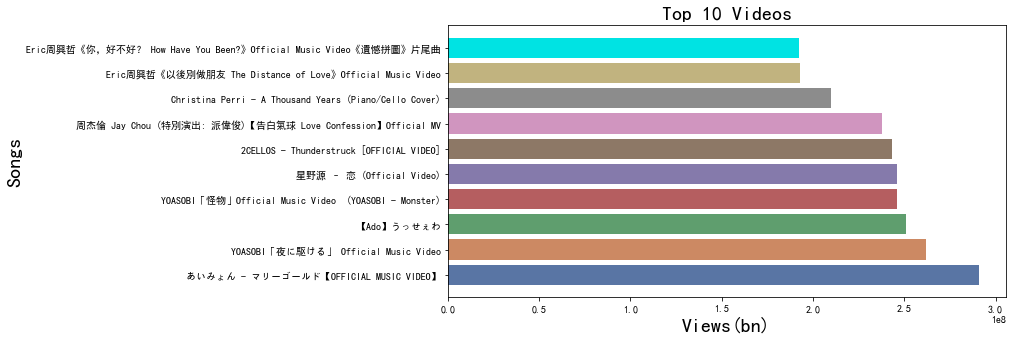

In [32]:
fig = plt.figure(figsize=(10, 5)) 
# ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3']
# creating the bar plot 
plt.barh(top10_videos['VideoTitle'], top10_videos['Views'], color=color)
plt.xlabel("Views(bn)",fontsize=20) 
plt.ylabel("Songs",fontsize=20) 
plt.title("Top 10 Videos",fontsize=20)
plt.show()

## 加入年份

In [33]:
data_all_channel['Year'] = pd.to_datetime(data_all_channel['PublishedAt']).dt.strftime('%Y')
data_all_channel

ChannelTitle                                         VideoTitle  \
0     Ru's Piano Ru味春捲  「The Blessing / YOASOBI」Mobile Suit Gundam THE...   
1     Ru's Piano Ru味春捲  SLAM DUNK ED3「Kirameku Toki ni Torawarete / 煌め...   
2     Ru's Piano Ru味春捲  Sword Art Online「Swordland」Ru's Piano Cover - ...   
3     Ru's Piano Ru味春捲  When Chainsaw Man Plays「KICK BACK」as Himself |...   
4     Ru's Piano Ru味春捲  Cyberpunk: Edgerunners OST「Who's Ready for Tom...   
...                ...                                                ...   
3727   First To Eleven             First To Eleven- Just Pretend Acoustic   
3728   First To Eleven                    DNCE- Cake By The Ocean (Cover)   
3729   First To Eleven                First To Eleven - James Conner Song   
3730   First To Eleven               Twenty One Pilots - Tear In My Heart   
3731   First To Eleven                     First to Eleven - Just Pretend   

                                            Description PublishedAt Language  \
0     「The Blessing / YOASOBI」Mobile Suit Gundam THE...  2022-11-11    en-US   
1     SLAM DUNK ED3「Kirameku Toki ni Torawarete」Pian...  2022-11-09    en-US   
2     Sword Art Online「Swordland」Ru's Piano Cover\n⚔...  2022-11-05    en-US   
3     When Chainsaw Man Plays「KICK BACK」as Himself \...  2022-10-29    en-US   
4     Cyberpunk: Edgerunners OST「Who's Ready for Tom...  2022-10-26    en-US   
...                                                 ...         ...      ...   
3727  Check out our acoustic version of Just Pretend...  2016-05-25            
3728  Hey guys! We are really digging this song righ...  2016-05-19            
3729  James Conner is an inspiration to many, but es...  2016-04-16            
3730  We LOVE this song so much we decided to do it ...  2016-03-30            
3731  Check out our covers and original music on iTu...  2016-03-23       en   

       Views  Likes  CommentCount  \
0          5    NaN          63.0   
1      57000    NaN         408.0   
2      46584    NaN         989.0   
3     388591    NaN        1049.0   
4      97613    NaN         383.0   
...      ...    ...           ...   
3727   24940    NaN          30.0   
3728  219868    NaN         213.0   
3729   18610    NaN          14.0   
3730  107780    NaN         114.0   
3731  355828    NaN         287.0   

                                                 Image  \
0     https://i.ytimg.com/vi/N3wdDiraq4g/hqdefault.jpg   
1     https://i.ytimg.com/vi/ecnwcQkregA/hqdefault.jpg   
2     https://i.ytimg.com/vi/gpjRHPwfsGw/hqdefault.jpg   
3     https://i.ytimg.com/vi/4lI2JIrbfuk/hqdefault.jpg   
4     https://i.ytimg.com/vi/J066w2P9mf0/hqdefault.jpg   
...                                                ...   
3727  https://i.ytimg.com/vi/YEXY6HmprZw/hqdefault.jpg   
3728  https://i.ytimg.com/vi/5DXkFIiXQYQ/hqdefault.jpg   
3729  https://i.ytimg.com/vi/vGTiJfyJQr0/hqdefault.jpg   
3730  https://i.ytimg.com/vi/WNUMNIyCtAo/hqdefault.jpg   
3731  https://i.ytimg.com/vi/qUAhsu6AlEs/hqdefault.jpg   

                                                   Tags  ...  Tag68 Tag69  \
0                                                        ...   None  None   
1     [SLAM DUNK ED3, 煌めく瞬間に捕われて, 捕捉閃耀的瞬間, スラムダンクED3...  ...   None  None   
2     [Swordland, Sword Art Online, 刀劍神域, SAO, ソードアー...  ...   None  None   
3     [KICK BACK, Chainsaw Man, チェンソーマン, 鏈鋸人, KICK B...  ...   None  None   
4     [Who's Ready for Tomorrow, I Really Want to St...  ...   None  None   
...                                                 ...  ...    ...   ...   
3727  [first, to, eleve, just, pretend, erie, pa, pv...  ...   None  None   
3728  [DNCE, CAKE, BY, THE, OCEAN, JONAS, JOE, DEMI,...  ...   None  None   
3729  [first, to, eleven, james, connor, pitt, footb...  ...   None  None   
3730  [first, to, eleven, falling, in, reverse, four...  ...   None  None   
3731  [first, to, eleven, erie, music, vans, warped,...  ...   None  None   

      Tag70 Tag71 Tag72 Tag73 Tag74 Tag75 Tag76  Year  
0

## 顯示年份上傳影片數量及排序

In [34]:
videos_per_year = data_all_channel.groupby('Year', as_index=False).size()
videos_per_year

Year  size
0   2008     2
1   2010    13
2   2011    52
3   2012    96
4   2013   199
5   2014   157
6   2015   181
7   2016   183
8   2017   171
9   2018   273
10  2019   438
11  2020   640
12  2021   632
13  2022   695

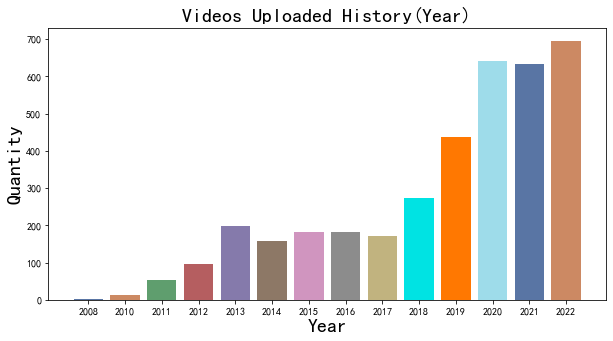

In [35]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_year['Year'], videos_per_year['size'], color=color) 
  
plt.xlabel("Year",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("Videos Uploaded History(Year)",fontsize=20)
plt.show()

## 加入月份

In [36]:
data_all_channel['Month'] = pd.to_datetime(data_all_channel['PublishedAt']).dt.strftime('%m')
data_all_channel.head()

ChannelTitle                                         VideoTitle  \
0  Ru's Piano Ru味春捲  「The Blessing / YOASOBI」Mobile Suit Gundam THE...   
1  Ru's Piano Ru味春捲  SLAM DUNK ED3「Kirameku Toki ni Torawarete / 煌め...   
2  Ru's Piano Ru味春捲  Sword Art Online「Swordland」Ru's Piano Cover - ...   
3  Ru's Piano Ru味春捲  When Chainsaw Man Plays「KICK BACK」as Himself |...   
4  Ru's Piano Ru味春捲  Cyberpunk: Edgerunners OST「Who's Ready for Tom...   

                                         Description PublishedAt Language  \
0  「The Blessing / YOASOBI」Mobile Suit Gundam THE...  2022-11-11    en-US   
1  SLAM DUNK ED3「Kirameku Toki ni Torawarete」Pian...  2022-11-09    en-US   
2  Sword Art Online「Swordland」Ru's Piano Cover\n⚔...  2022-11-05    en-US   
3  When Chainsaw Man Plays「KICK BACK」as Himself \...  2022-10-29    en-US   
4  Cyberpunk: Edgerunners OST「Who's Ready for Tom...  2022-10-26    en-US   

    Views  Likes  CommentCount  \
0       5    NaN          63.0   
1   57000    NaN         408.0   
2   46584    NaN         989.0   
3  388591    NaN        1049.0   
4   97613    NaN         383.0   

                                              Image  \
0  https://i.ytimg.com/vi/N3wdDiraq4g/hqdefault.jpg   
1  https://i.ytimg.com/vi/ecnwcQkregA/hqdefault.jpg   
2  https://i.ytimg.com/vi/gpjRHPwfsGw/hqdefault.jpg   
3  https://i.ytimg.com/vi/4lI2JIrbfuk/hqdefault.jpg   
4  https://i.ytimg.com/vi/J066w2P9mf0/hqdefault.jpg   

                                                Tags  ...  Tag69 Tag70  Tag71  \
0                                                     ...   None  None   None   
1  [SLAM DUNK ED3, 煌めく瞬間に捕われて, 捕捉閃耀的瞬間, スラムダンクED3...  ...   None  None   None   
2  [Swordland, Sword Art Online, 刀劍神域, SAO, ソードアー...  ...   None  None   None   
3  [KICK BACK, Chainsaw Man, チェンソーマン, 鏈鋸人, KICK B...  ...   None  None   None   
4  [Who's Ready for Tomorrow, I Really Want to St...  ...   None  None   None   

  Tag72 Tag73 Tag74 Tag75 Tag76  Year Month  
0  None  None  None  None  None  2022    11  
1  None  None  None  None  None  2022    11  
2  None  None  None  None  None  2022    11  
3  None  None  None  None  None  2022    10  
4  None  None  None  None  None  2022    10  

[5 rows x 97 columns]

## 顯示個月份上傳數量

In [37]:
videos_per_month = data_all_channel.groupby('Month', as_index=False).size()
videos_per_month

Month  size
0     01   278
1     02   274
2     03   316
3     04   302
4     05   306
5     06   325
6     07   335
7     08   325
8     09   319
9     10   317
10    11   309
11    12   326

In [38]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [106]:
# videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order, ordered=True)
# videos_per_month = videos_per_month.sort_index()
# videos_per_month

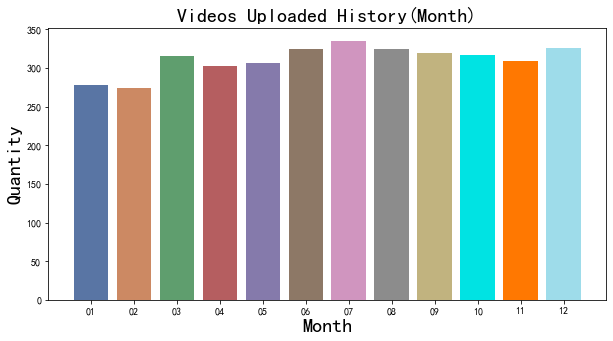

In [39]:
fig = plt.figure(figsize=(10, 5)) 
color = ['#5975a4', '#cc8963', '#5f9e6e', '#b55e60', '#857aab', '#8d7866', '#d095bf', '#8c8c8c', '#c1b37f', '#00E3E3', '#ff7801','#9edcea']
# creating the bar plot 
plt.bar(videos_per_month['Month'], videos_per_month['size'], color=color) 
  
plt.xlabel("Month",fontsize=20) 
plt.ylabel("Quantity",fontsize=20) 
plt.title("Videos Uploaded History(Month)",fontsize=20)
plt.show()

## 文字雲

In [40]:
from collections import Counter
all_terms = []
for terms in data_all_channel['Tags']:
    all_terms.extend(terms)
sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)

[('cover', 886),
 ('ピアノ', 702),
 ('音樂', 641),
 ('piano', 640),
 ('弾いてみた', 559),
 ('鋼琴', 549),
 ('panpiano', 547),
 ('演奏', 535),
 ('獨奏', 523),
 ('コバソロ', 522),
 ('kobasolo', 519),
 ('PANPIANO', 508),
 ('arrangement', 506),
 ('first take', 383),
 ('ファーストテイク', 383),
 ('the first take', 382),
 ('COLORS', 380),
 ('一発撮り', 380),
 ('ファステク', 379),
 ('緊張感', 378),
 ('DSCVR', 377),
 ('Tokyo sounds', 376),
 ('lute', 376),
 ('tiny desk', 374),
 ('music', 357),
 ('周杰倫', 315),
 ('pop', 299),
 ('Chou', 298),
 ('KOBASOLO', 295),
 ('こばそろ', 292),
 ('cello', 266),
 ('チャンネル登録者数10000人突破しました!／コバソロ', 265),
 ('恋する乙男／コバソロ（Original）', 259),
 ('カケラ/コバソロ(orignal)', 259),
 ('ネガイゴト/コバソロ（Original）', 259),
 ('質問に答えてみよう/コバソロ', 258),
 ('質問に答えてみよう②/コバソロ', 257),
 ('The Piano Guys', 247),
 ('Echo/コバソロwith良知真次（Original）', 239),
 ('周杰伦', 235),
 ('チャンネル登録者数20000人突破!!/コバソロ', 235),
 ('杰威尔', 231),
 ('官方', 228),
 ('旅立ち／コバソロwith良知真次（Orignalsong）', 225),
 ('NEWALBUM『コバソロ★ワークショップ』30秒CM／コバソロ', 225),
 ('『背中合わせ』コバソロ（original）【商品紹介!?】1stm

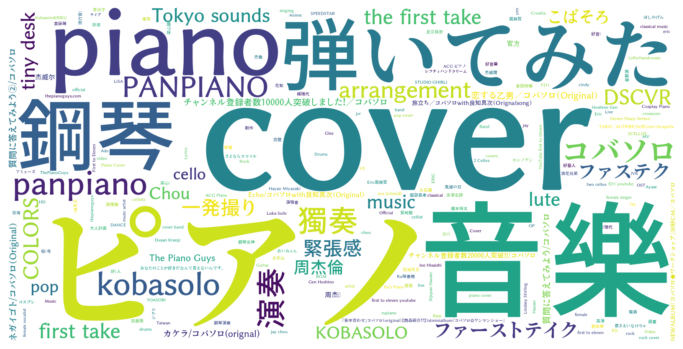

In [41]:
from wordcloud import WordCloud
from PIL import Image
from os import path
# mask = np.array(Image.open("wordcloud.png"))
font_path = 'ttf/GenEiAntiquePv5-M.ttf'
wc = WordCloud(width=1600, height=800, background_color='white', font_path = font_path)
wc.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## 觀察流量留言及Tags之間的關係

In [42]:
def plot_views(df, channel_name):
    date = df.loc[df['ChannelTitle'] == channel_name, 'PublishedAt']
    views = df.loc[df['ChannelTitle'] == channel_name, 'Views']
    CommentCount = df.loc[df['ChannelTitle'] == channel_name, 'CommentCount']
    VideoTagNum = df.loc[df['ChannelTitle'] == channel_name, 'VideoTagNum']
    
#     plt.figure(figsize=(16,6))
#     plt.subplot(121)
#     plt.xlabel('Date')
#     plt.ylabel('Views')
#     plt.plot(date, views)
    
#     plt.subplot(122)
#     plt.xlabel('Date')
#     plt.ylabel('Comments')
#     plt.plot(date, CommentCount, color = 'g')

#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     line1 = ax1.plot(date, views, color='#ff7801', label='Views')
#     line2 = ax2.plot(date, CommentCount, color='#5975a4', label='Comments')
#     lines = line1 + line2
#     labels = [l.get_label() for l in lines]
#     ax1.legend(lines, labels, loc=0)
    fig, (ax1, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

    parax2 = ax1.twinx()
    ax1.plot(date, views, c="#ff7801", label="Views")
    parax2.plot(date, CommentCount, c="#5975a4", label="Comments")
    ax1.legend(loc=0)
    
    parax4 = ax3.twinx()
    ax3.plot(date, views, c="#857aab", label="Views")
    parax4.plot(date, VideoTagNum, c="y", label="VideoTagNum")
    parax4.legend(loc=0)

    plt.suptitle(channel_name)

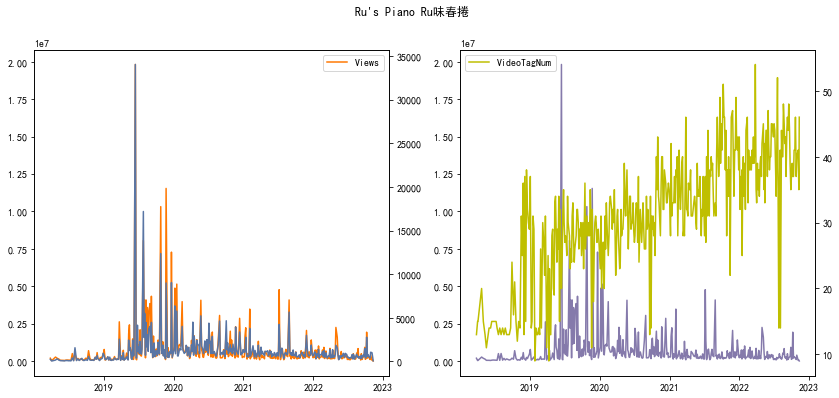

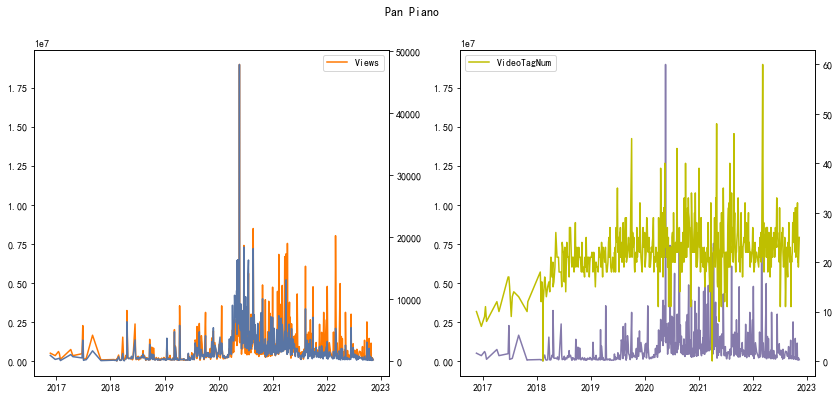

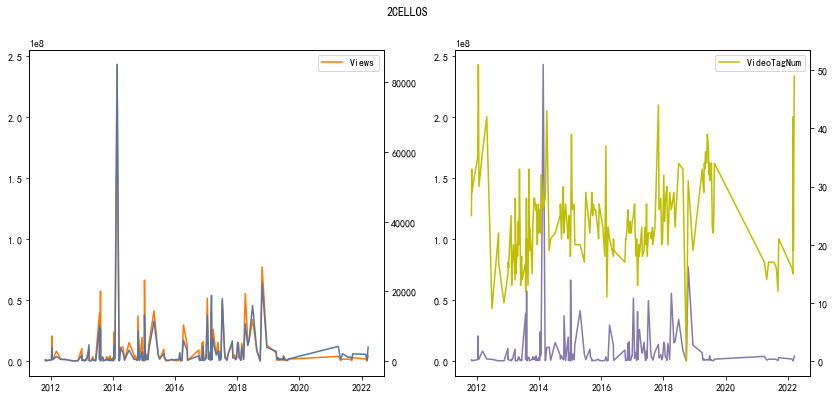

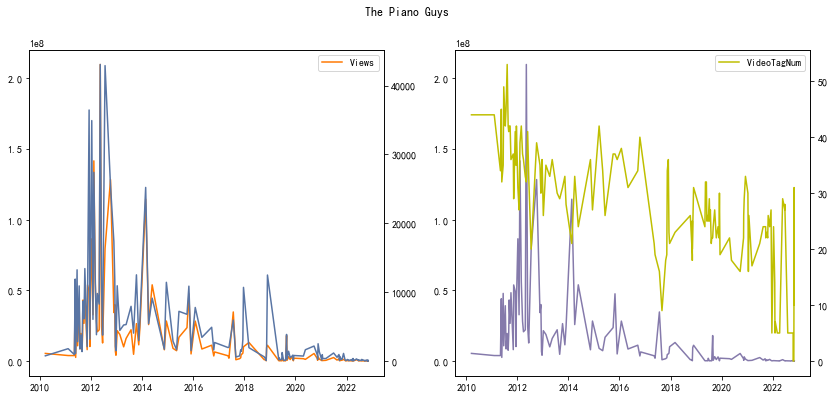

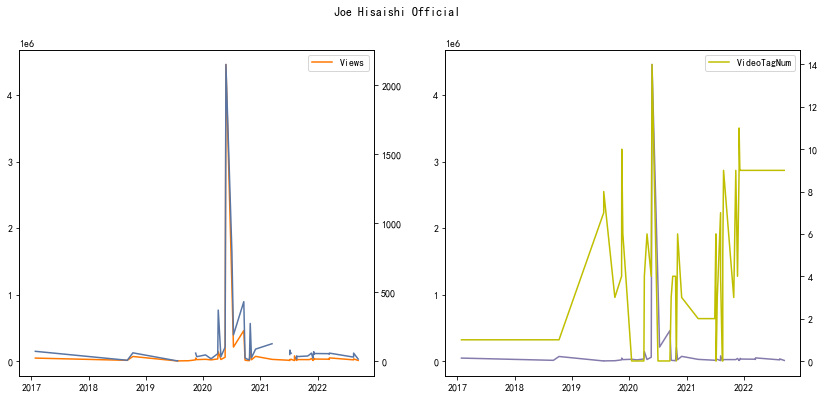

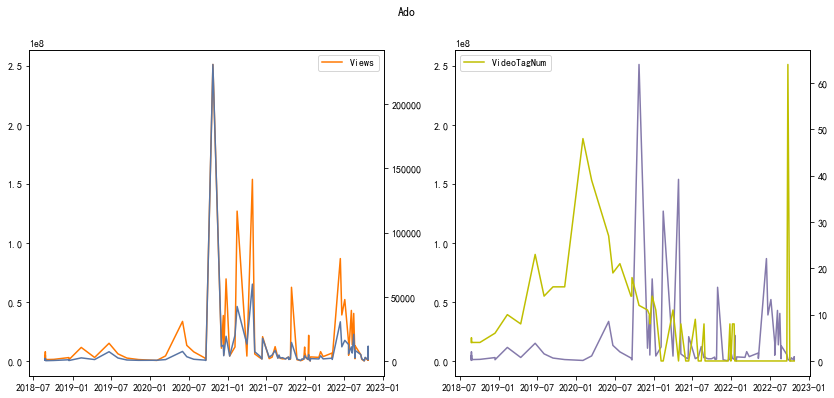

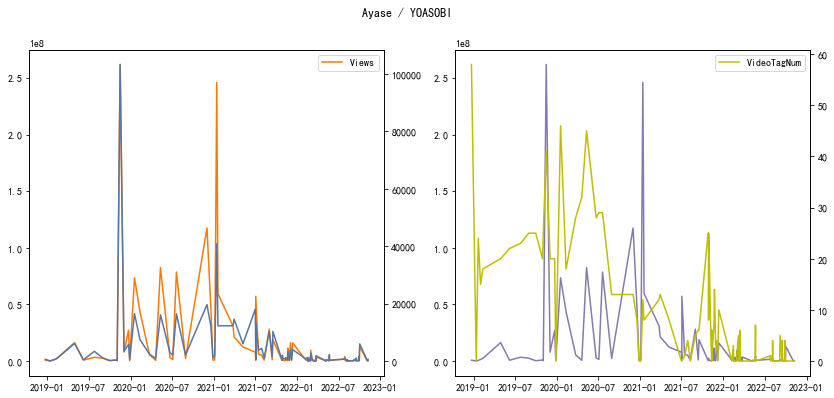

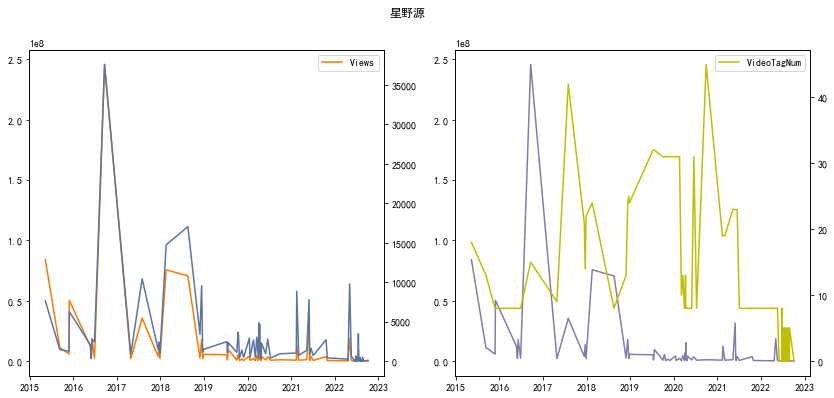

/Users/takuya/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


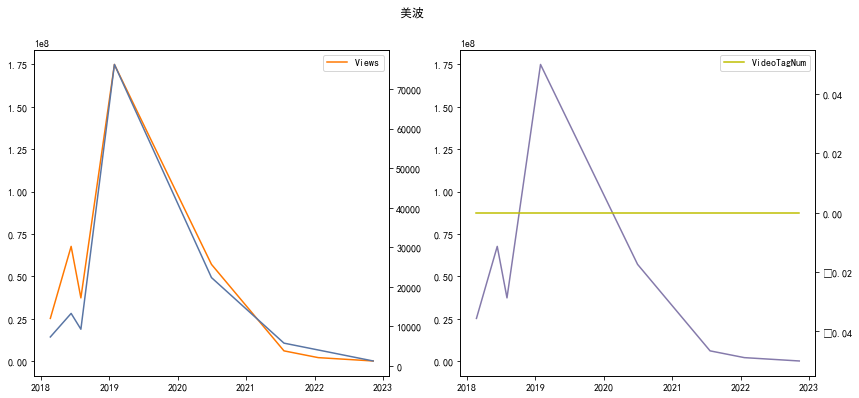

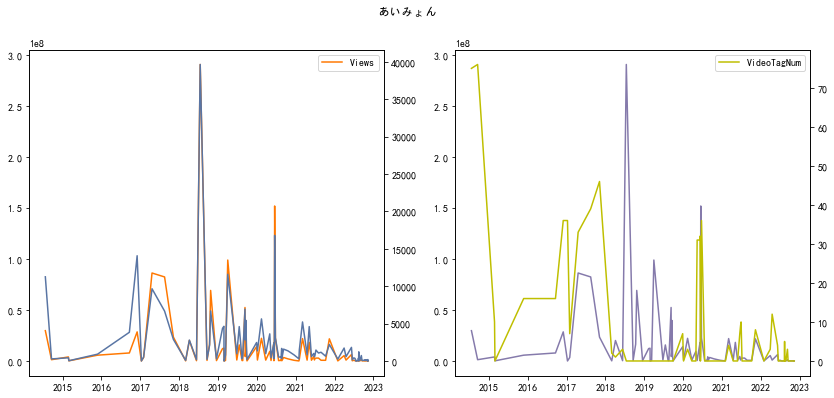

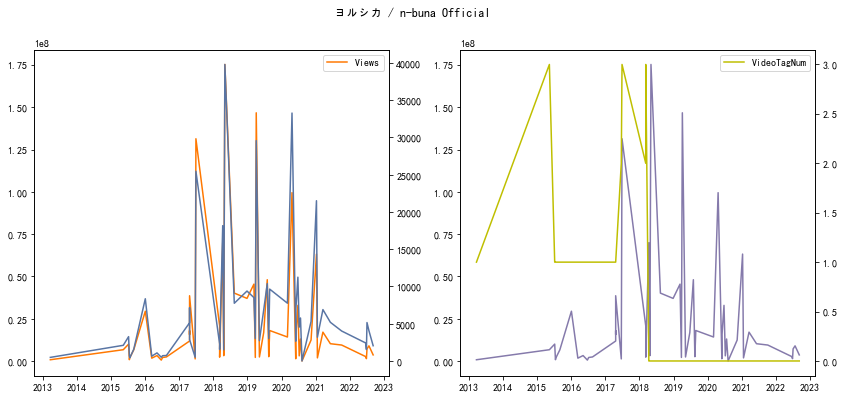

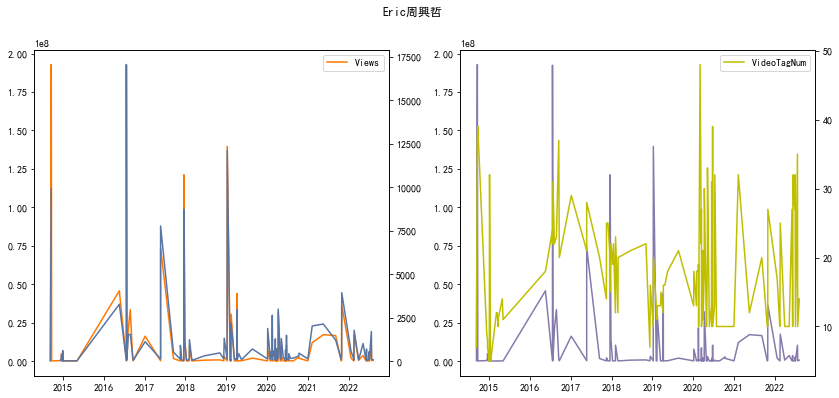

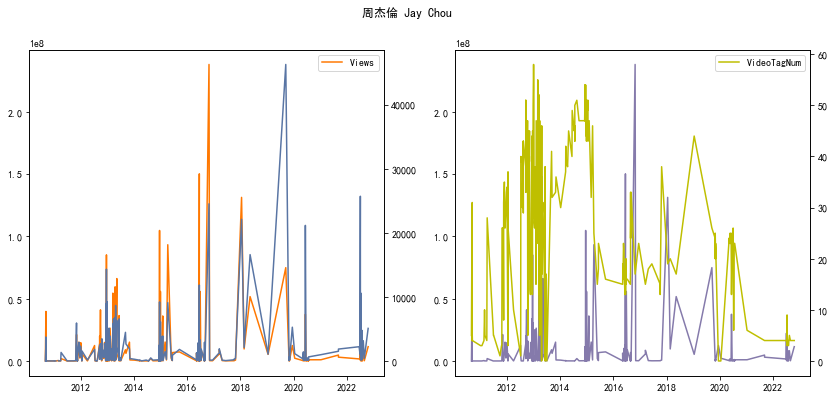

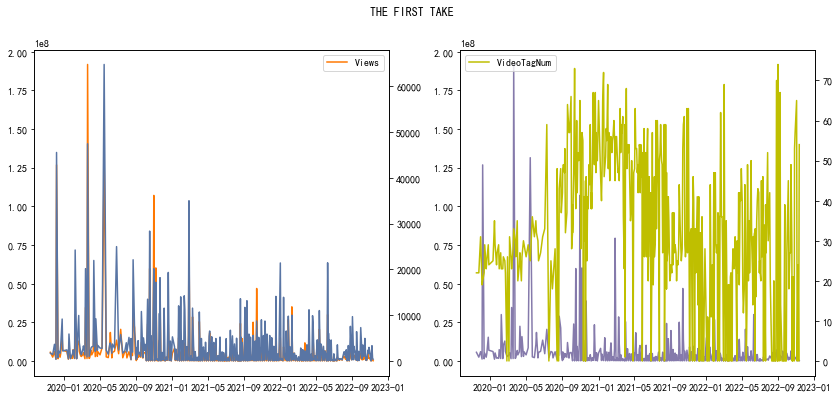

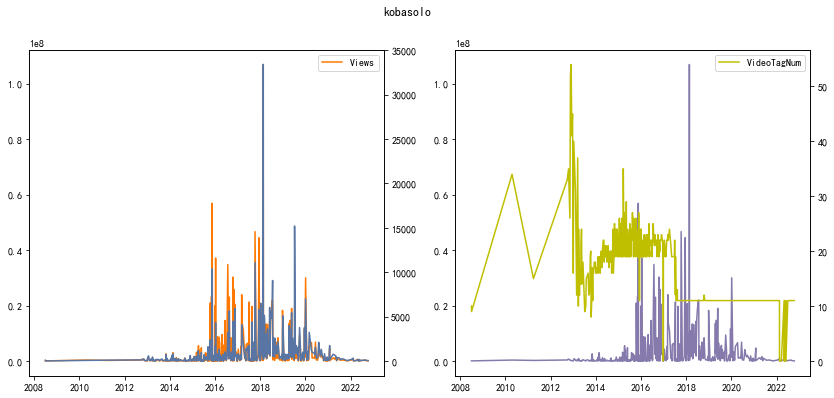

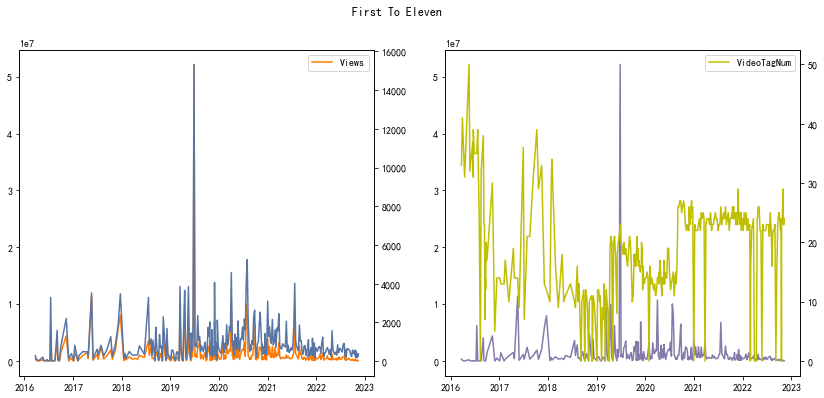

In [43]:
plot_views(data_all_channel, "Ru's Piano Ru味春捲")
plot_views(data_all_channel, "Pan Piano")
plot_views(data_all_channel, "2CELLOS")
plot_views(data_all_channel, "The Piano Guys")
plot_views(data_all_channel, "Joe Hisaishi Official")
plot_views(data_all_channel, "Ado")
plot_views(data_all_channel, "Ayase / YOASOBI")
plot_views(data_all_channel, "星野源")
plot_views(data_all_channel, "美波")
plot_views(data_all_channel, "あいみょん")
plot_views(data_all_channel, "ヨルシカ / n-buna Official")
plot_views(data_all_channel, "Eric周興哲")
plot_views(data_all_channel, "周杰倫 Jay Chou")
plot_views(data_all_channel, "THE FIRST TAKE")
plot_views(data_all_channel, "kobasolo")
plot_views(data_all_channel, "First To Eleven")